In [1]:
"""
import os
import seaborn as sns
import numpy as np
from matplotlib.pyplot import imread
"""
#(we imported the libraries)

In [2]:
"""
dim1 = []
dim2 = []
for image_filename in os.listdir('./project'):
    name, ext = os.path.splitext(image_filename)
    try:
        if not ext == '.xml':
            img= imread('./project/'+image_filename)
            d1,d2,color = img.shape
            dim1.append(d1)
            dim2.append(d2)
            
    except:
        print(image_filename)
        continue
"""
# this code takes only the image file as the output

C:\Users\MSC1\anaconda3\envs\OD\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


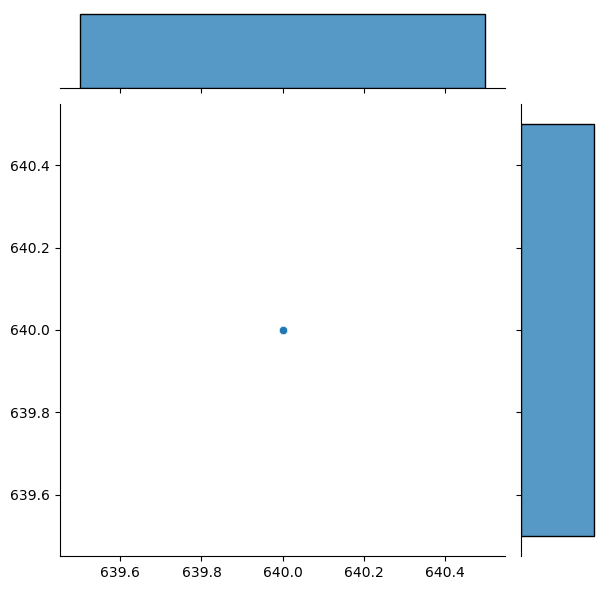

In [3]:
# sns.jointplot(dim1,dim2)

In [4]:
# np.mean(dim1)

640.0

In [ ]:
#(since we already resized and padded our images to 640*640, these are expected outputs)

In [5]:
# print('Min:',np.min(dim1))
# print('Max:',np.max(dim1))

Min: 640
Max: 640


In [6]:
#np.mean(dim2)

640.0

In [7]:
#print('Min:',np.min(dim2))
#print('Max:',np.max(dim2))

Min: 640
Max: 640


In [ ]:
#(Code to clean the XML files)

In [36]:
# !python xmlconversion.py --verbose

images\EquusQuagga002.xml
images\EquusQuagga003.xml
images\EquusQuagga004.xml
images\EquusQuagga005.xml
images\EquusQuagga006.xml
images\EquusQuagga007.xml
images\EquusQuagga009.xml
images\EquusQuagga010.xml
images\EquusQuagga011.xml
images\EquusQuagga012.xml
images\EquusQuagga014.xml
images\EquusQuagga015.xml
images\EquusQuagga016.xml
images\EquusQuagga017.xml
images\EquusQuagga018.xml
images\EquusQuagga019.xml
images\EquusQuagga020.xml
images\EquusQuagga021.xml
images\EquusQuagga022.xml
images\EquusQuagga023.xml
images\EquusQuagga024.xml
images\EquusQuagga026.xml
images\EquusQuagga027.xml
images\EquusQuagga028.xml
images\EquusQuagga029.xml
images\EquusQuagga030.xml
images\EquusQuagga031.xml
images\EquusQuagga032.xml
images\EquusQuagga034.xml
images\EquusQuagga035.xml
images\EquusQuagga038.xml
images\EquusQuagga0386.xml
images\EquusQuagga0387.xml
images\EquusQuagga0388.xml
images\EquusQuagga0389.xml
images\EquusQuagga039.xml
images\EquusQuagga0390.xml
images\EquusQuagga0391.xml
images

'rsync' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
# !python partition_dataset.py -x -i ./images -r 0.1
#(Now we are going to Split our dataset into Training and Testing with Test Ratio of 0.1)

In [38]:
# !code ./data/label_map.pbtxt

In [ ]:
#(Now we going to generate TFRecords for Train and Test)

In [39]:
# !python generate_tfrecord.py -x images/train -l data/label_map.pbtxt -o data/train.record

Successfully created the TFRecord file: data/train.record


In [40]:
# !python generate_tfrecord.py -x images/test -l data/label_map.pbtxt -o data/test.record

Successfully created the TFRecord file: data/test.record


In [62]:
# PATH_TO_MODEL = "faster_rcnn_resnet101_v1_1024x1024_coco17_tpu-8"

In [63]:
# !code ./training/TF2/training/{PATH_TO_MODEL}/pipeline.config

In [67]:
# !python model_main_tf2.py --model_dir=training/TF2/training/{PATH_TO_MODEL} --pipeline_config_path=training/TF2/training/{PATH_TO_MODEL}/pipeline.config --num_train_steps=6000 --alsologtostderr

C:\Users\MSC1\anaconda3\envs\OD\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(
INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
I1222 10:41:58.013623  8476 mirrored_strategy.py:374] Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:GPU:0',)
INFO:tensorflow:Maybe overwriting train_steps: 6000
I1222 10:41:58.022656  8476 config_util.py:552] Maybe overwriting train_steps: 6000
INFO:tensorflow:Maybe overwriting use_bfloat16: False
I1222 10:41:58.022656  8476 config_util.p

In [72]:
!python exporter_main_v2.py --input_type image_tensor --pipeline_config_path training/TF2/training/{PATH_TO_MODEL}/pipeline.config --trained_checkpoint_dir training/TF2/training/{PATH_TO_MODEL}/ --output_directory /training/TF2/training/{PATH_TO_MODEL}/saved_model/


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
W1222 11:18:13.093015  7760 deprecation.py:623] From C:\Users\MSC1\anaconda3\envs\OD\lib\site-packages\tensorflow\python\autograph\impl\api.py:458: calling map_fn_v2 (from tensorflow.python.ops.map_fn) with back_prop=False is deprecated and will be removed in a future version.
Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.map_fn(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.map_fn(fn, elems))
Instructions for updating:
Use fn_output_signature instead
W1222 11:18:13.093015  7760 deprecation.py:554] From C:\Users\MSC1\anaconda3\envs\OD\lib\site-packages\tensorflow\python\util\deprecation.py:629: calling map_fn_v2 (from tensorflow.python.ops

In [ ]:
"""
Here we clean the XML files and save the Images and XML files into a folder named cleaned.
We then split the dataset into training and testing with Test Ratio of 0.1
We update the Label Map
Now we create the TFRecords for both Train and Test.
After that we need to Update the Pipeline configuration file.
We update the number of classes into 3 and provide the path for the TFRecords Train and Test files and 
also the Checkpoint directory has to be updated.
once pipeline configuration file has been updated, we are ready to train our model.
We trained our model and completed our training with minimal loss.
The number of steps were 6000 and batch size was 32.
Finally we exported a trained inference graph.
"""